In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [3]:
df = df[df['lemmatized'].notna()]

In [4]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [5]:
tweets = df[df['lemmatized'].str.contains('michaelkors')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('michaelkors', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
4576,4576,1225446231230623745,1581004123,2020-02-06 15:48:43,RitzHerald,Michael Kors Unveils Exclusive Partnership and...,none,0.0,NaN,NaN,...,243,153,46,NaN,2010-10-03 11:14:24,NaN,michaelkors; jamesbond007; 007style; jamesbond...,False,Michael Kors Unveils Exclusive Panership and C...,michael kors unveil exclusive panership capsul...
20383,20383,1225712282992291840,1581067555,2020-02-07 09:25:55,schuhkurier,#Coronavirus: Michael Kors-Mutter rechnet mit ...,none,0.0,NaN,NaN,...,272,99,24,NaN,2009-08-19 13:37:30,NaN,Coronavirus; michaelkors; umsatz; trends; fashion,False,Coronavirus: Michael Kors-Mutter rechnet mit M...,coronavirus michael kors mutter rechnen millio...
50475,50475,1226236898332565504,1581192633,2020-02-08 20:10:33,jumpmane24,New Michael Kors Bag @MichaelKors . . . . . . ...,none,0.0,NaN,NaN,...,50,730,0,NaN,2019-03-04 04:54:11,MichaelKors,stl; fitness; blackmen; missouri; teamblackmen...,False,New Michael Kors Bag MichaelKors . . . . . . ....,new michael kors bag michael kors ➖➖➖➖➖➖➖➖➖➖➖➖...
75285,75285,1226585714327990275,1581275797,2020-02-09 19:16:37,MichaelKors,A preview of the MKC Monogramme North-South to...,none,0.0,NaN,NaN,...,587,3538,8597,NaN,2010-06-08 17:15:41,NaN,MichaelKorsCollection; AllAccessKors; NYFW,False,A preview of the MKC Monogramme Noh-South tote...,preview mkc monogramme noh south tote upcoming...
75298,75298,1226585857408348162,1581275831,2020-02-09 19:17:11,CountRessYvonne,RT @MichaelKors: A preview of the MKC Monogram...,none,NaN,NaN,NaN,...,59,96988,2,NaN,2017-10-15 17:05:50,MichaelKors,MichaelKorsCollection; AllAccessKors; NYFW,True,A preview of the MKC Monogramme Noh-South tote...,preview mkc monogramme noh south tote upcoming...


# We can now proceed with the proper LDA 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['allaccesskors',
 'am',
 'animalprint',
 'arlette',
 'arrive',
 'ashbenzo',
 'backstage',
 'bag',
 'bella',
 'black',
 'blake',
 'blakelively',
 'blomqvist',
 'boot',
 'call',
 'cameron',
 'chain',
 'chicago',
 'day',
 'debut',
 'discover',
 'dove',
 'ebay',
 'ebayfashion',
 'ebayfind',
 'entire',
 'est',
 'estatesale',
 'fashion',
 'fashionauction',
 'first',
 'getty',
 'hadid',
 'ig',
 'image',
 'images',
 'imyour',
 'imyour_joy',
 'issarae',
 'joy',
 'korscollection',
 'line',
 'list',
 'live',
 'lively',
 'local',
 'look',
 'losangele',
 'love',
 'macys',
 'make',
 'matching',
 'michael',
 'mkc',
 'moda',
 'modcloth',
 'monogramme',
 'more',
 'morning',
 'new',
 'newyork',
 'noh',
 'nordstrom',
 'ny',
 'orville',
 'peck',
 'peek',
 'preview',
 'redvelvet',
 'rockabilly',
 'rvsmtown',
 'sara',
 'say',
 'see',
 'setting',
 'sho',
 'shop',
 'shos',
 'sneak',
 'south',
 'spread',
 'stage',
 'stop',
 'store',
 'style',
 'take',
 'then',
 'thrifty',
 'thriftyfashion',
 'thriftyfind',
 '

In [7]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

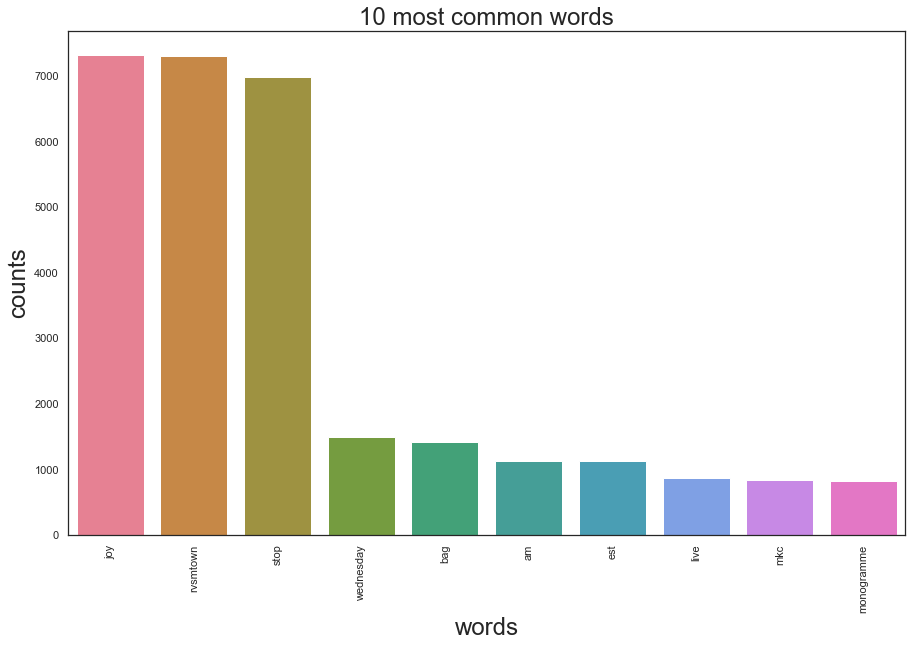

In [8]:
plot_10_most_common_words(tf,vectorizer)

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 4
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [10]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -135942.23445516493
Perplexity:  16.883881352934157
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [12]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [13]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
hadid bella morning new style discover tomorrow michael fashion valentine day ebay backstage york newyork arrive cameron dove losangele rockabilly

Topic #1:
am est wednesday live upcoming watch tote mkc monogramme entire store south preview noh discover boot sneak arlette peek more

Topic #2:
joy rvsmtown stop 조이 redvelvet 레드벨벳 getty image arrive blakelively blake lively imyour_joy images จอยใน ของ ig michael ashbenzo imyour

Topic #3:
bag first mkc walk shop monogramme see list store call local then love wednesday chain take orville peck stage allaccesskors


In [52]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

We can save the model so not to have to generate it again

In [53]:
pyLDAvis.save_html(LDAvis_prepared, './michaelKors'+ str(number_of_topics) +'.html')

We look at the probabilities to belong to each topic for each document and add them to the dataframe.

In [14]:
df = pd.DataFrame(columns=['topic','word'])

In [15]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [16]:
df.to_csv('topic_word_michael_kors.csv')